# Auswertung von R2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Hier werden die R2-Werte der vervollständigten Datensätze visualisiert und die Ergebnistabellen für alle Durchläufe der Experimente erstellt.

In [3]:
set_names = ['r1','r1_detail','r2','r2_detail', 'r3','r3_detail']
sets = []
for name in set_names:
    sets.append(pd.read_csv(f'additional_data/results/{name}.csv'))
sets = {set_names[i]: sets[i] for i in range(len(sets))}

In [4]:
sets['r1_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r2_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r3_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']

sets['r1_detail'].run = sets['r1_detail'].run + 1
sets['r2_detail'].run = sets['r2_detail'].run + 1
sets['r3_detail'].run = sets['r3_detail'].run + 1

sets['r1_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r2_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r3_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)

sets['r1_detail'].set_index(['method', 'run'], inplace=True)
sets['r2_detail'].set_index(['method', 'run'], inplace=True)
sets['r3_detail'].set_index(['method', 'run'], inplace=True)

sets['r1'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r2'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r3'].columns = ['method', 'r2','RMSE','still_missing','t']

sets['r1_detail'].still_missing = sets['r1_detail'].still_missing.astype(int)
sets['r2_detail'].still_missing = sets['r2_detail'].still_missing.astype(int)
sets['r3_detail'].still_missing = sets['r3_detail'].still_missing.astype(int)


sets['r1'].set_index('method', inplace=True)
sets['r2'].set_index('method', inplace=True)
sets['r3'].set_index('method', inplace=True)

## R2 visualisieren

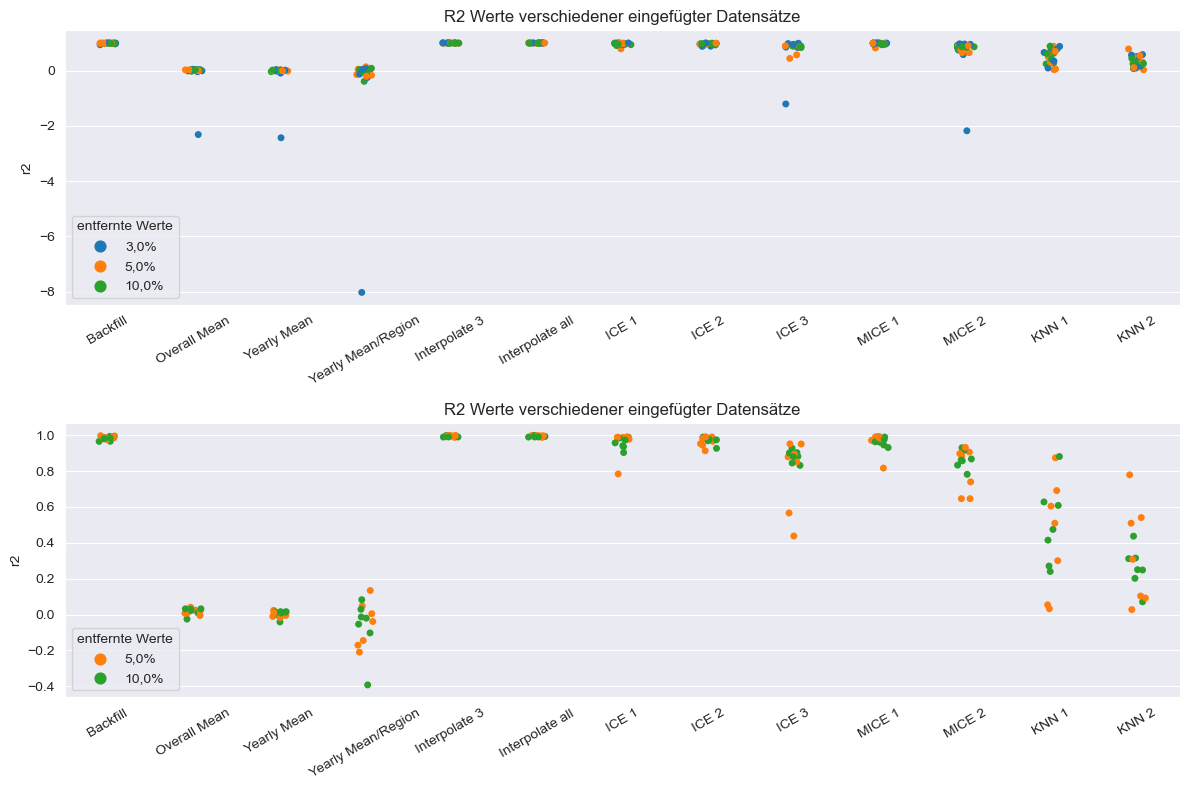

In [5]:
rs = pd.DataFrame({'3,0%': sets['r1_detail'].r2, '5,0%':sets['r2_detail'].r2, '10,0%': sets['r3_detail'].r2},
                 index = sets['r1_detail'].r2.index)
rs = rs.reset_index()

rs2 = pd.DataFrame({'5,0%':sets['r2_detail'].r2, '10,0%': sets['r3_detail'].r2},
                 index = sets['r1_detail'].r2.index)
rs2 = rs.reset_index()
rs2.drop(['index', '3,0%'], axis=1, inplace=True)


d1 = pd.DataFrame(rs.drop('run', axis=1).set_index('method').stack())
d1 = d1.reset_index()
d1.columns = ['Methode', 'entfernte Werte', 'r2']

d2 = pd.DataFrame(rs2.drop('run', axis=1).set_index('method').stack())
d2 = d2.reset_index()
d2.columns = ['Methode', 'entfernte Werte', 'r2']



sns.set_style("darkgrid")
#sns.set_palette("Set1")
sns.set_palette("tab10")

fig, (ax1, ax2) = plt.subplots(figsize =(12, 8), nrows=2)
sns.stripplot(data=d1, x='Methode', y='r2', hue='entfernte Werte', palette=["C0", "C1", "C2", ], ax=ax1)
sns.stripplot(data=d2, x='Methode', y='r2', hue='entfernte Werte', palette=["C1", "C2"], ax=ax2)

ax1.set_title('R2 Werte verschiedener eingefügter Datensätze')
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel('')

ax2.set_title('R2 Werte verschiedener eingefügter Datensätze')
ax2.tick_params(axis='x', rotation=30)
ax2.set_xlabel('')

plt.tight_layout()

plt.savefig('figures/results/r2')

In [55]:
rs.method.unique()

array(['Backfill', 'Overall Mean', 'Yearly Mean', 'Yearly Mean/Region',
       'Interpolate 3', 'Interpolate all', 'ICE 1', 'ICE 2', 'ICE 3',
       'MICE 1', 'MICE 2', 'KNN 1', 'KNN 2'], dtype=object)

In [42]:
rs2 = pd.DataFrame(rs.set_index(['method', 'run']).stack())
rs2 = rs2.loc[~((rs2.index.get_level_values(1)==1) & (rs2.index.get_level_values(2)=='3,0%'))]
rs2 = rs2.unstack().droplevel(0, axis=1)

In [67]:
rs2

,method,run,"3,0%","5,0%","10,0%"
0,Backfill,1,NaN,1.00,0.97
1,Backfill,2,0.98,0.99,0.97
2,Backfill,3,0.99,0.98,0.99
3,Backfill,4,0.99,0.99,0.99
4,Backfill,5,1.00,1.00,0.99
...,...,...,...,...,...
86,Yearly Mean/Region,3,-0.26,0.13,-0.01
87,Yearly Mean/Region,4,-0.13,-0.04,-0.05
88,Yearly Mean/Region,5,0.04,0.00,-0.02
89,Yearly Mean/Region,6,0.07,-0.17,-0.10


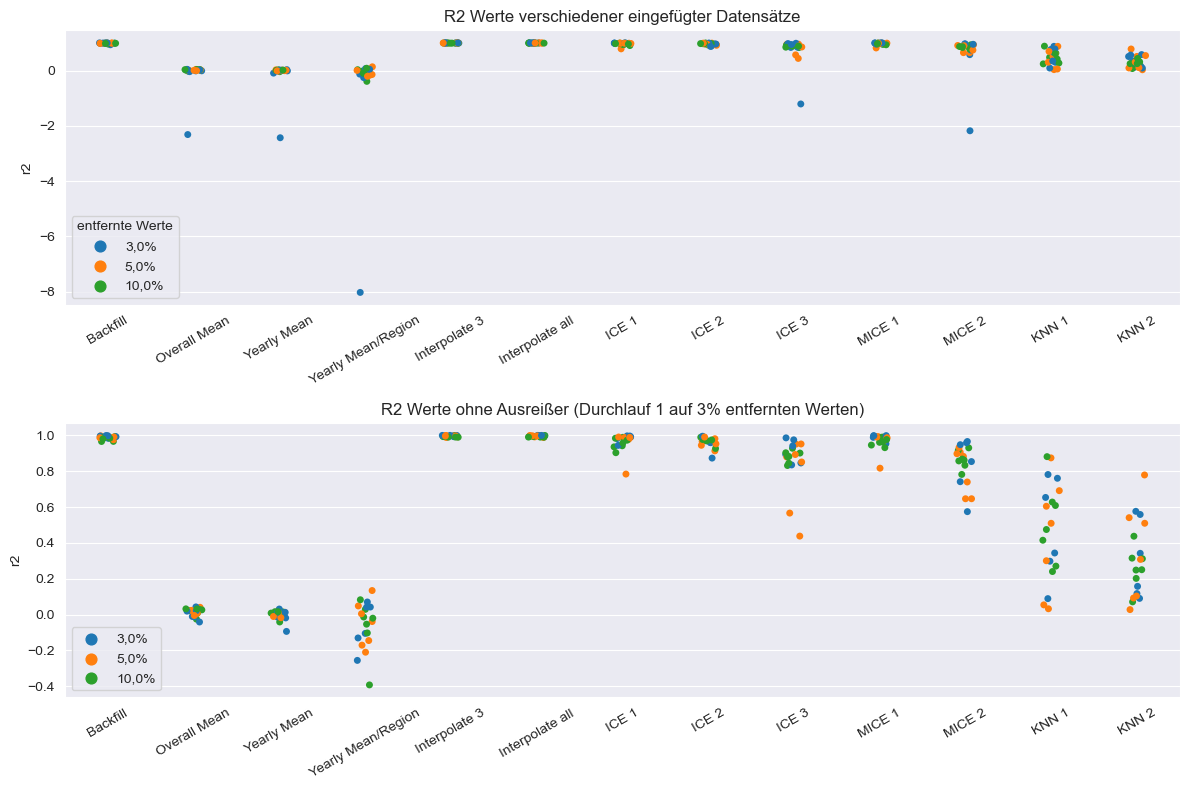

In [96]:
rs = pd.DataFrame({'3,0%': sets['r1_detail'].r2, '5,0%':sets['r2_detail'].r2, '10,0%': sets['r3_detail'].r2},
                 index = sets['r1_detail'].r2.index)
rs = rs.reset_index()

rs2 = pd.DataFrame(rs.set_index(['method', 'run']).stack())
rs2 = rs2.loc[~((rs2.index.get_level_values(1)==1) & (rs2.index.get_level_values(2)=='3,0%'))]
rs2 = rs2.unstack().droplevel(0, axis=1)
rs2 = rs2.reset_index()
rs2['method'] = pd.Categorical(rs2['method'],
                                   categories=rs.method.unique(),
                                   ordered=True)


d1 = pd.DataFrame(rs.drop('run', axis=1).set_index('method').stack())
d1 = d1.reset_index()
d1.columns = ['Methode', 'entfernte Werte', 'r2']

d2 = pd.DataFrame(rs2.drop('run', axis=1).set_index('method').stack())
d2 = d2.reset_index()
d2.columns = ['Methode', 'entfernte Werte', 'r2']



sns.set_style("darkgrid")
#sns.set_palette("Set1")
sns.set_palette("tab10")

fig, (ax1, ax2) = plt.subplots(figsize =(12, 8), nrows=2)
sns.stripplot(data=d1, x='Methode', y='r2', hue='entfernte Werte',palette=["C0", "C1", "C2", ], ax=ax1)
sns.stripplot(data=d2, x='Methode', y='r2', hue='entfernte Werte',palette=["C1", "C2", "C0", ], ax=ax2)

ax1.set_title('R2 Werte verschiedener eingefügter Datensätze')
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel('')

ax2.set_title('R2 Werte ohne Ausreißer (Durchlauf 1 auf 3% entfernten Werten)')
ax2.tick_params(axis='x', rotation=30)
ax2.set_xlabel('')
handles, labels = ax2.get_legend_handles_labels()
order = [2,0,1]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order])


plt.tight_layout()

#plt.savefig('figures/results/r2')

## Tabellen erstellen

In [88]:
print(sets['r1'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method                 &       &       &                &        \\
\midrule
Backfill               &  0.98 &  0.06 &      135535.57 &   0.56 \\
Overall Mean           & -0.33 &  0.88 &           0.00 &   0.83 \\
Yearly Mean            & -0.36 &  0.88 &       52298.00 &   0.65 \\
Yearly Mean per Region & -1.20 &  0.91 &       58248.43 &   0.79 \\
Interpolate 3          &  1.00 &  0.03 &      134354.57 &   2.53 \\
Interpolate all        &  1.00 &  0.03 &      112679.29 &   1.78 \\
ICE 1                  &  0.98 &  0.08 &           0.00 &  10.36 \\
ICE 2                  &  0.95 &  0.19 &           0.00 &  76.02 \\
ICE 3                  &  0.61 &  0.22 &           0.00 &  79.40 \\
MICE 1                 &  0.99 &  0.06 &           0.00 & 136.15 \\
MICE 2                 &  0.41 &  0.26 

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_13028\4129489065.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))


In [89]:
print(sets['r2'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method                 &       &       &                &        \\
\midrule
Backfill               &  0.99 &  0.08 &      135735.29 &   0.88 \\
Overall Mean           &  0.02 &  0.94 &           0.00 &   1.16 \\
Yearly Mean            &  0.00 &  0.95 &       52298.00 &   1.00 \\
Yearly Mean per Region & -0.05 &  0.97 &       58352.71 &   1.11 \\
Interpolate 3          &  1.00 &  0.05 &      134538.00 &   3.12 \\
Interpolate all        &  1.00 &  0.05 &      112822.00 &   2.28 \\
ICE 1                  &  0.96 &  0.14 &           0.00 &  11.90 \\
ICE 2                  &  0.96 &  0.18 &           0.00 &  93.83 \\
ICE 3                  &  0.79 &  0.36 &           0.00 &  94.09 \\
MICE 1                 &  0.96 &  0.14 &           0.00 & 166.84 \\
MICE 2                 &  0.81 &  0.37 

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_13028\2753717235.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r2'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))


In [90]:
print(sets['r3'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method                 &       &       &                &        \\
\midrule
Backfill               &  0.98 &  0.11 &      136315.29 &   1.61 \\
Overall Mean           &  0.02 &  0.80 &           0.00 &   1.98 \\
Yearly Mean            &  0.00 &  0.81 &       52320.57 &   1.69 \\
Yearly Mean per Region & -0.07 &  0.83 &       58597.43 &   1.81 \\
Interpolate 3          &  0.99 &  0.07 &      135062.14 &   3.99 \\
Interpolate all        &  0.99 &  0.07 &      113218.57 &   3.03 \\
ICE 1                  &  0.95 &  0.16 &           0.00 &  13.06 \\
ICE 2                  &  0.97 &  0.13 &           0.00 &  95.60 \\
ICE 3                  &  0.88 &  0.27 &           0.00 &  94.59 \\
MICE 1                 &  0.97 &  0.14 &           0.00 & 170.08 \\
MICE 2                 &  0.86 &  0.29

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_13028\1507838682.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r3'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))


In [91]:
print(sets['r1_detail'].to_latex(longtable=True,
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Backfill & 1 &  0.93 &  0.03 &         135530 &   0.57 \\
      & 2 &  0.98 &  0.07 &         135514 &   0.56 \\
      & 3 &  0.99 &  0.04 &         135555 &   0.56 \\
      & 4 &  0.99 &  0.05 &         135512 &   0.55 \\
      & 5 &  1.00 &  0.09 &         135536 &   0.56 \\
      & 6 &  1.00 &  0.04 &         135532 &   0.56 \\
      & 7 &  1.00 &  0.10 &         135570 &   0.56 \\
Overall

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_13028\4172264568.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1_detail'].to_latex(longtable=True,


In [92]:
print(sets['r2_detail'].to_latex(longtable=True,
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Backfill & 1 &  1.00 &  0.09 &         135735 &   0.87 \\
      & 2 &  0.99 &  0.07 &         135759 &   0.88 \\
      & 3 &  0.98 &  0.09 &         135763 &   0.87 \\
      & 4 &  0.99 &  0.06 &         135732 &   0.90 \\
      & 5 &  1.00 &  0.10 &         135733 &   0.88 \\
      & 6 &  0.99 &  0.06 &         135720 &   0.90 \\
      & 7 &  0.99 &  0.07 &         135705 &   0.89 \\
Overall

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_13028\1743318558.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r2_detail'].to_latex(longtable=True,


In [10]:
print(sets['r3_detail'].to_latex(longtable=True,
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Backfill & 1 &  0.97 &  0.09 &         136318 &   1.61 \\
      & 2 &  0.97 &  0.17 &         136383 &   1.61 \\
      & 3 &  0.99 &  0.07 &         136254 &   1.63 \\
      & 4 &  0.99 &  0.11 &         136287 &   1.60 \\
      & 5 &  0.99 &  0.09 &         136382 &   1.62 \\
      & 6 &  0.98 &  0.08 &         136345 &   1.61 \\
      & 7 &  0.98 &  0.15 &         136238 &   1.62 \\
Overa

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_13124\1069224385.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r3_detail'].to_latex(longtable=True,
